## **Task 3.3 - Housing Price Prediction: Linear Regression VS Random Forest.**

**Name: RAHUL SANATAN BEHARA**

**Class: M.Sc.DataScience & Big Data Analytics**

## **Importing Libraries.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

## **Reading the Dataset.**

In [ ]:
house_data = pd.read_csv('/content/Mumbai1.csv')
house_data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            6347 non-null   int64 
 1   Price                 6347 non-null   int64 
 2   Area                  6347 non-null   int64 
 3   Location              6347 non-null   object
 4   No. of Bedrooms       6347 non-null   int64 
 5   New/Resale            6347 non-null   int64 
 6   Gymnasium             6347 non-null   int64 
 7   Lift Available        6347 non-null   int64 
 8   Car Parking           6347 non-null   int64 
 9   Maintenance Staff     6347 non-null   int64 
 10  24x7 Security         6347 non-null   int64 
 11  Children's Play Area  6347 non-null   int64 
 12  Clubhouse             6347 non-null   int64 
 13  Intercom              6347 non-null   int64 
 14  Landscaped Gardens    6347 non-null   int64 
 15  Indoor Games          6347 non-null   

## **Data Preprocessing.**

In [ ]:
house_data.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms',
       'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking',
       'Maintenance Staff', '24x7 Security', 'Children's Play Area',
       'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games',
       'Gas Connection', 'Jogging Track', 'Swimming Pool'],
      dtype='object')

In [ ]:
house_data['Location'].unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [ ]:
total_loc = len(house_data.Location.unique())
print("Total number of unique city location ", total_loc)

Total number of unique city location  413


In [ ]:
# Total counts of Bedrooms.

house_data['No. of Bedrooms'].value_counts()

2    2601
1    2307
3    1201
4     190
5      39
6       7
7       2
Name: No. of Bedrooms, dtype: int64

In [ ]:
house_data.duplicated().sum()

0

In [ ]:
house_data.isnull().sum()

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [ ]:
house_data.shape

(6347, 19)

In [ ]:
house_data=house_data.drop(['Unnamed: 0',"Children's Play Area",'Gas Connection','Jogging Track','Intercom','Clubhouse','Gymnasium','Indoor Games',],axis=1)

In [ ]:
house_data.shape

(6347, 11)

In [ ]:
# Calculated price per square fit for houses by dividing actual price with area.

house_data['Price_per_sqft'] = house_data['Price']/house_data['Area']

## **Data Visualization.**

### Univariate Analysis.

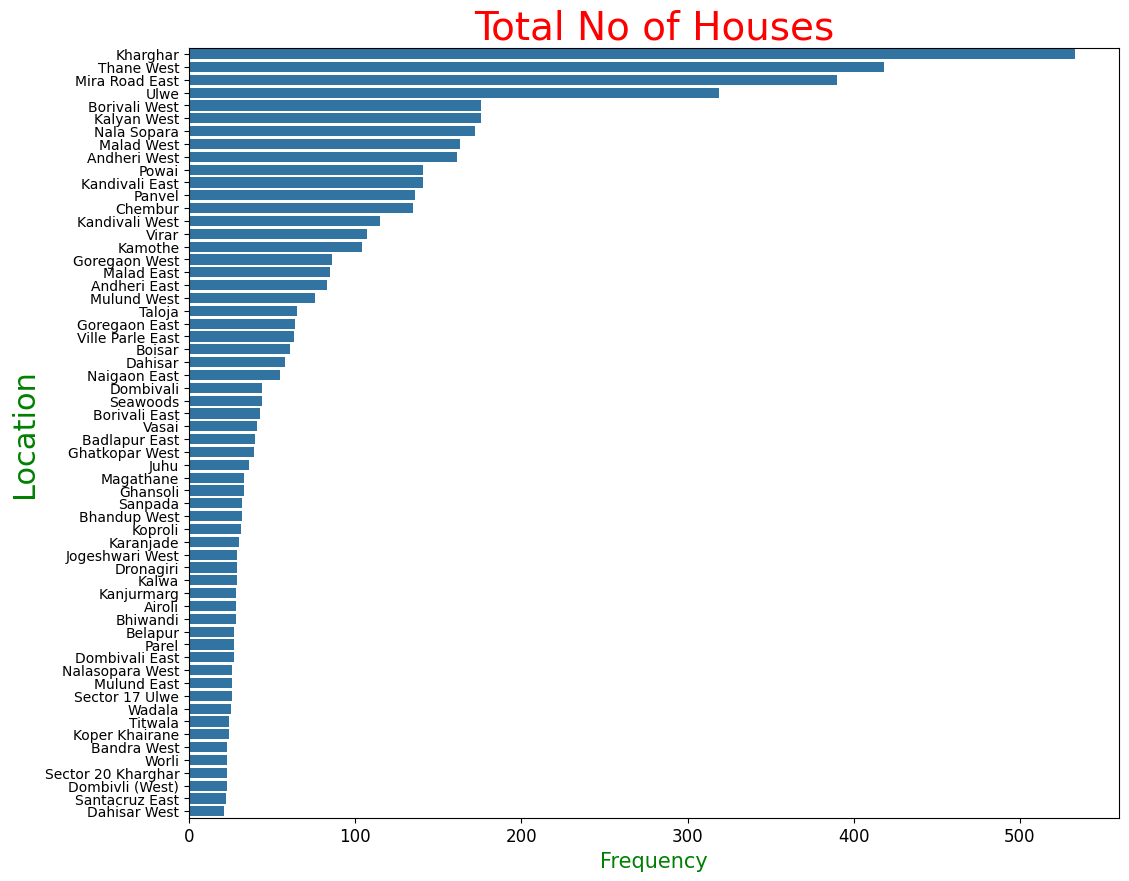

In [ ]:
plt.figure(figsize=(12,10))
most_cat = house_data['Location'].value_counts()[:60]
sns.barplot(x=most_cat, y=most_cat.index)
plt.xticks(size=12)
plt.xlabel("Frequency", size=15, c="g")
plt.ylabel("Location", size=22, c="g")
plt.title("Total No of Houses", size=28, c="r")
plt.show()

### Bi-Variate Analysis.

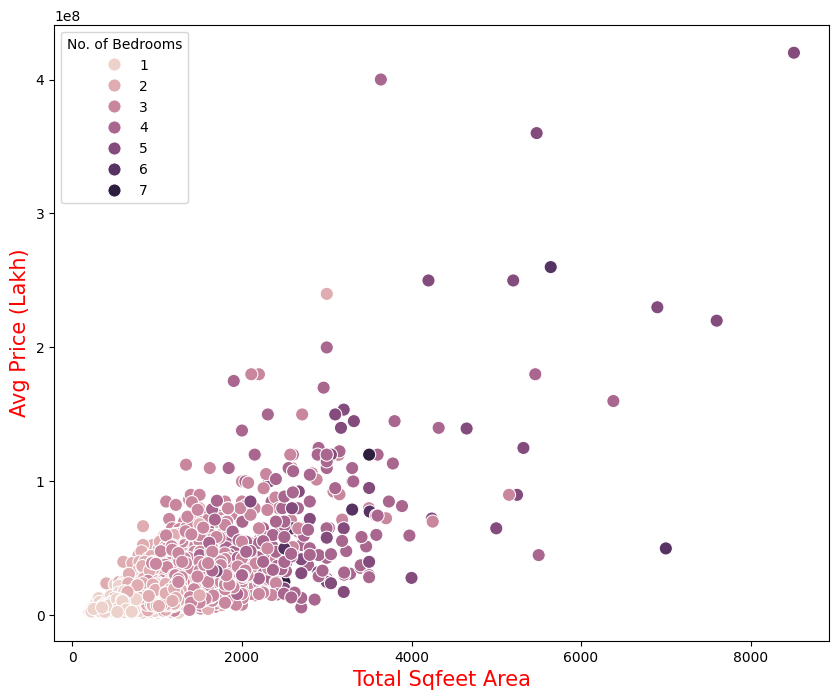

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Area',y='Price',data=house_data,hue='No. of Bedrooms',s=90)
plt.xlabel("Total Sqfeet Area",size=15,c="r")
plt.ylabel("Avg Price (Lakh)",size=15,c="r")
plt.show()

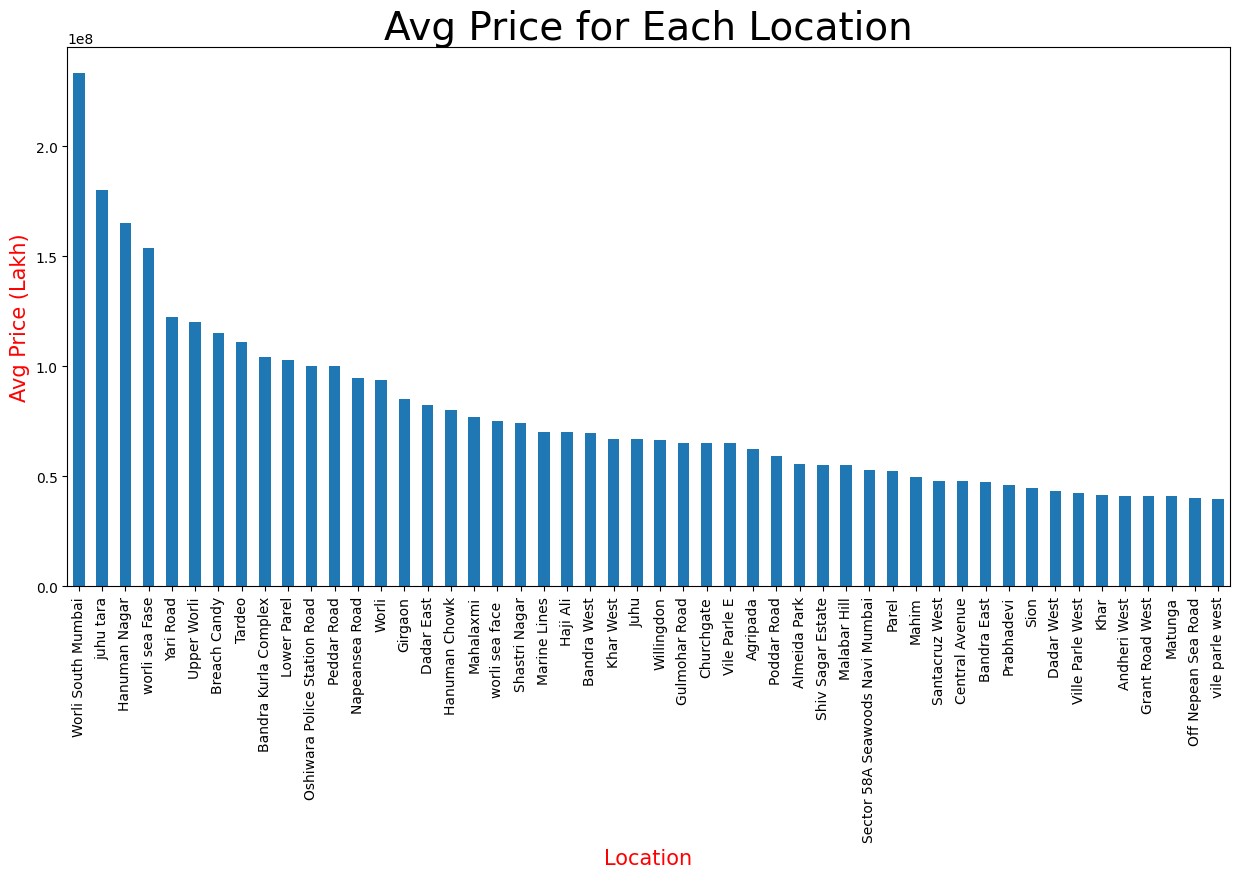

In [ ]:
plt.figure(figsize=(15,7))
house_data.groupby("Location")['Price'].mean().sort_values(ascending=False)[:50].plot(kind="bar")
plt.xlabel("Location",size=15,c="r")
plt.ylabel("Avg Price (Lakh)",size=15,c="r")
plt.title("Avg Price for Each Location",size=28,c="k")
plt.show()

### Encoding the Data & removing outliers.

In [ ]:
# we have one categorical column in the dataset, but we need to convert that in numerical form to feed it to our model because machine undesrtand only numerical values.

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
house_data['Location']= label_encoder.fit_transform(house_data['Location'])

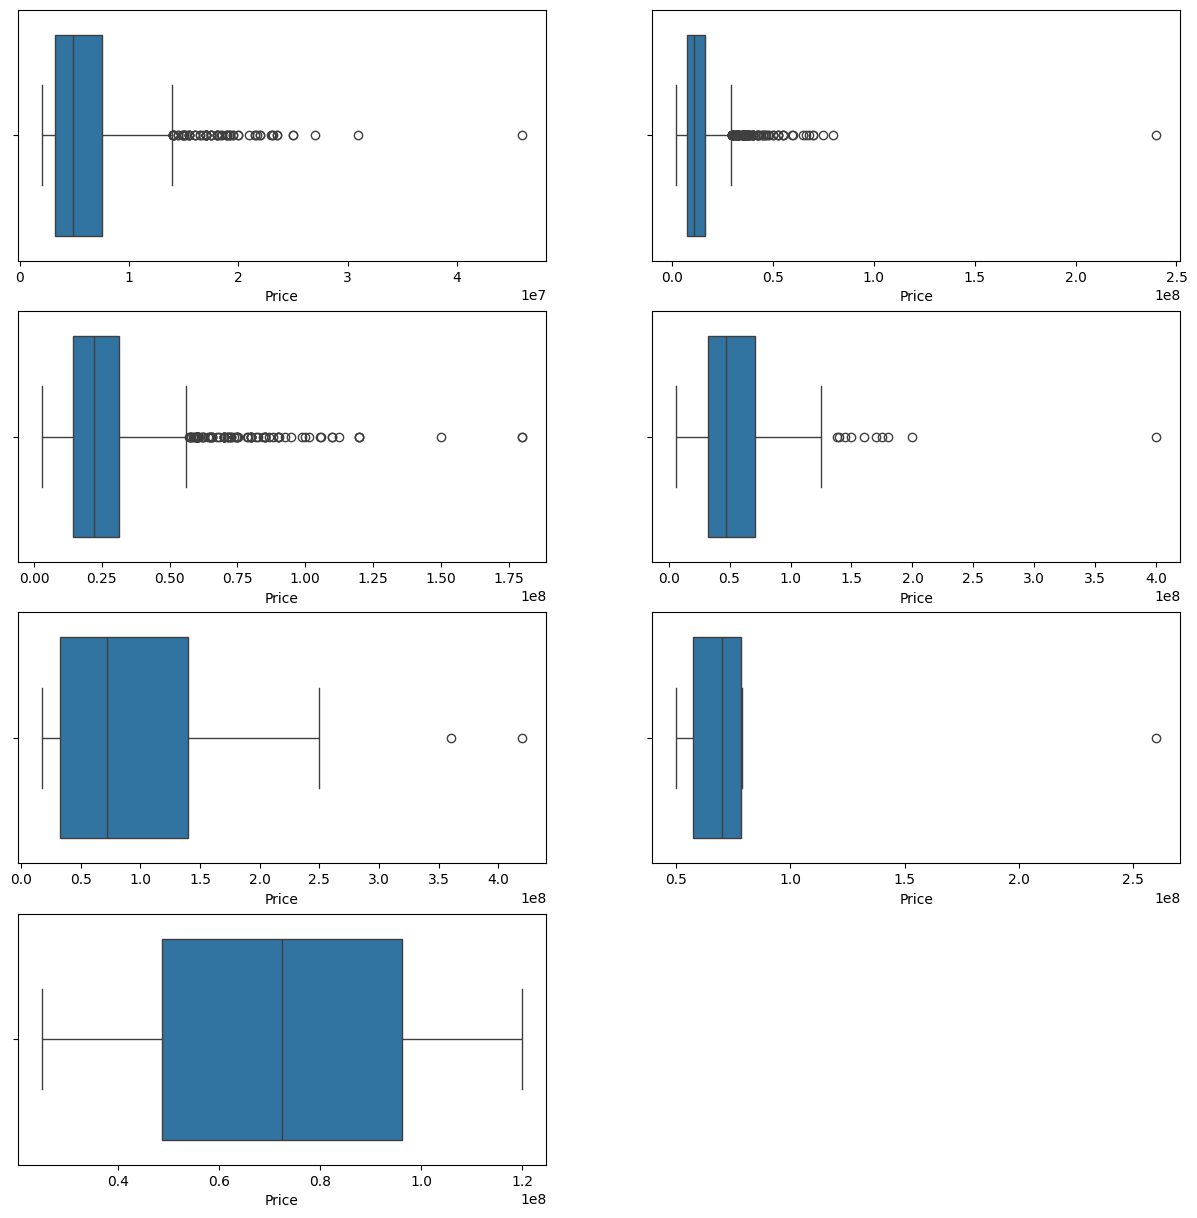

In [ ]:
df_1=house_data[house_data['No. of Bedrooms']==1]
df_2=house_data[house_data['No. of Bedrooms']==2]
df_3=house_data[house_data['No. of Bedrooms']==3]
df_4=house_data[house_data['No. of Bedrooms']==4]
df_5=house_data[house_data['No. of Bedrooms']==5]
df_6=house_data[house_data['No. of Bedrooms']==6]
df_7=house_data[house_data['No. of Bedrooms']==7]
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.boxplot(data=df_1,x=df_1['Price'])
plt.subplot(4,2,2)
sns.boxplot(data=df_2,x=df_2['Price'])
plt.subplot(4,2,3)
sns.boxplot(data=df_3,x=df_3['Price'])
plt.subplot(4,2,4)
sns.boxplot(data=df_4,x=df_4['Price'])
plt.subplot(4,2,5)
sns.boxplot(data=df_5,x=df_5['Price'])
plt.subplot(4,2,6)
sns.boxplot(data=df_6,x=df_6['Price'])
plt.subplot(4,2,7)
sns.boxplot(data=df_7,x=df_7['Price'])
plt.show()

In [ ]:
def removeOutliners(df):
  df_Out = pd.DataFrame()
  for key,subdf in df.groupby('Location'):
    m = np.mean(subdf.Price_per_sqft)
    st = np.std(subdf.Price_per_sqft)
    reduced = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
    df_Out = pd.concat([df_Out,reduced],ignore_index=True)
  return df_Out
house_data = removeOutliners(house_data)

## **Train Test Split.**

In [ ]:
X=house_data.drop(columns=['Price'],axis=1)
Y=house_data['Price']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(4617, 11) (3231, 11) (1386, 11)


In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape)

(4617,) (3231,) (1386,)


In [ ]:
X.head()

,Area,Location,No. of Bedrooms,New/Resale,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Landscaped Gardens,Swimming Pool,Price_per_sqft
0,400,4,1,0,1,1,1,1,0,0,15500.000000
1,1000,4,2,0,1,1,1,1,0,1,9500.000000
2,1245,4,2,1,1,1,0,0,0,0,11967.871486
3,1183,4,2,1,1,1,0,1,1,1,11834.319527
4,1245,4,2,0,1,1,1,1,0,0,11887.550201


In [ ]:
Y_test.head()

4454     4100000
2118    11500000
42       2836000
3879    14500000
2727     4400000
Name: Price, dtype: int64

In [ ]:
Y_train.head()

4271    3951000
3079    2100000
1158    5700000
4106    7200000
1432    7700000
Name: Price, dtype: int64

## **Model Building.**

## Linear Regression.

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)

LR_prediction=lr_clf.predict(X_test)
print('R2 Score :',r2_score(LR_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(LR_prediction,Y_test))
print('MSE:',mean_squared_error(LR_prediction,Y_test))
rmse = sqrt(mean_squared_error(LR_prediction,Y_test))
print('RMSE:',rmse)

R2 Score : 80.09760649846551
MAE: 3139419.4789326168
MSE: 47218856655210.7
RMSE: 6871597.824029773


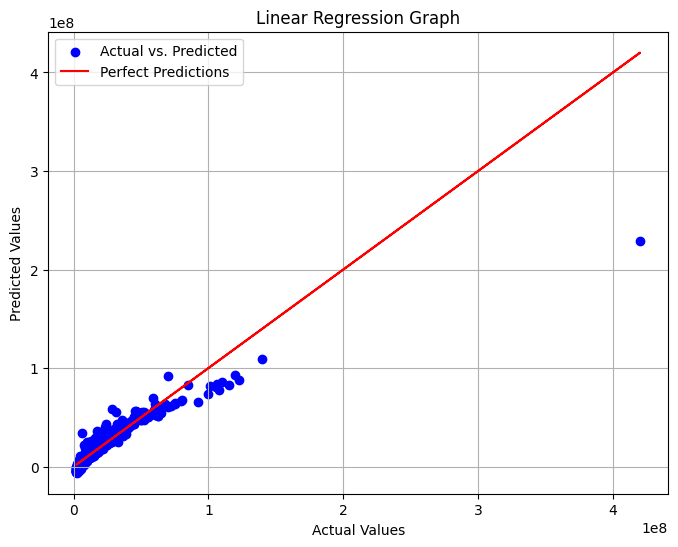

In [ ]:
# Plotting the linear regression graph with a straight line
plt.figure(figsize=(8, 6))

# Plot the actual values against the predicted values
plt.scatter(Y_test, LR_prediction, color='blue', label='Actual vs. Predicted')

# Plot a straight line representing perfect predictions (y_test = y_pred)
plt.plot(Y_test, Y_test, color='red', label='Perfect Predictions')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Graph')

# Add a legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

## Random Forest Regression.

In [ ]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RF_prediction=RF.predict(X_test)
print('R2 Score :',r2_score(RF_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(RF_prediction,Y_test))
print('MSE:',mean_squared_error(RF_prediction,Y_test))
rmse = sqrt(mean_squared_error(RF_prediction,Y_test))
print('RMSE:',rmse)

RF.score(X_test,Y_test)

R2 Score : 87.95030918548584
MAE: 406173.7645310245
MSE: 29797831883573.195
RMSE: 5458739.037870669


0.9086155222802703

In [ ]:
plt.figure(figsize=(8, 6))

# Plotting actual values VS the predicted values
plt.scatter(Y_test, RF_prediction, color='blue', label='Actual vs. Predicted')

# Plotting a straight line representing perfect predictions (y_test = y_pred)
plt.plot(Y_test, Y_test, color='red', label='Perfect Predictions')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression Graph')

# Add a legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()